# BT2103 Group Project

## Preparation

Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
credit = pd.read_csv("card.csv",skiprows=1)
credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


## Exploratory Data Analysis

### Data Cleaning

1. Remove NA Values

In [3]:
#No null values for each column
credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

2. Refactor variable names and types

In [4]:
#renaming PAY_0 to PAY_1
credit.rename(columns={'PAY_0':'PAY_1'}, inplace=True)


#refactor data types of categorical variables
credit["SEX"] = credit["SEX"].astype("category")
credit["EDUCATION"] = credit["EDUCATION"].astype("category")
credit["MARRIAGE"] = credit["MARRIAGE"].astype("category")
credit["PAY_1"] = credit["PAY_1"].astype("category")
credit["PAY_2"] = credit["PAY_2"].astype("category")
credit["PAY_3"] = credit["PAY_3"].astype("category")
credit["PAY_4"] = credit["PAY_4"].astype("category")
credit["PAY_5"] = credit["PAY_5"].astype("category")
credit["PAY_6"] = credit["PAY_6"].astype("category")
credit["default payment next month"] = credit["default payment next month"].astype("category")
credit.dtypes

ID                               int64
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_1                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month    category
dtype: object

3. Reassign unknown values

In [5]:
#presence of unknown values
print(credit["EDUCATION"].value_counts())
print(credit["MARRIAGE"].value_counts())

#categorise the unknown values under 'others'
credit["EDUCATION"] = credit["EDUCATION"].apply(lambda x: x if (0<int(x)<4) else 4)
credit["MARRIAGE"] = credit["MARRIAGE"].apply(lambda x: x if (1<=int(x)<=2) else 3)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


### Descriptive Statistics

In [6]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0


### Data Visualisation

Histogram

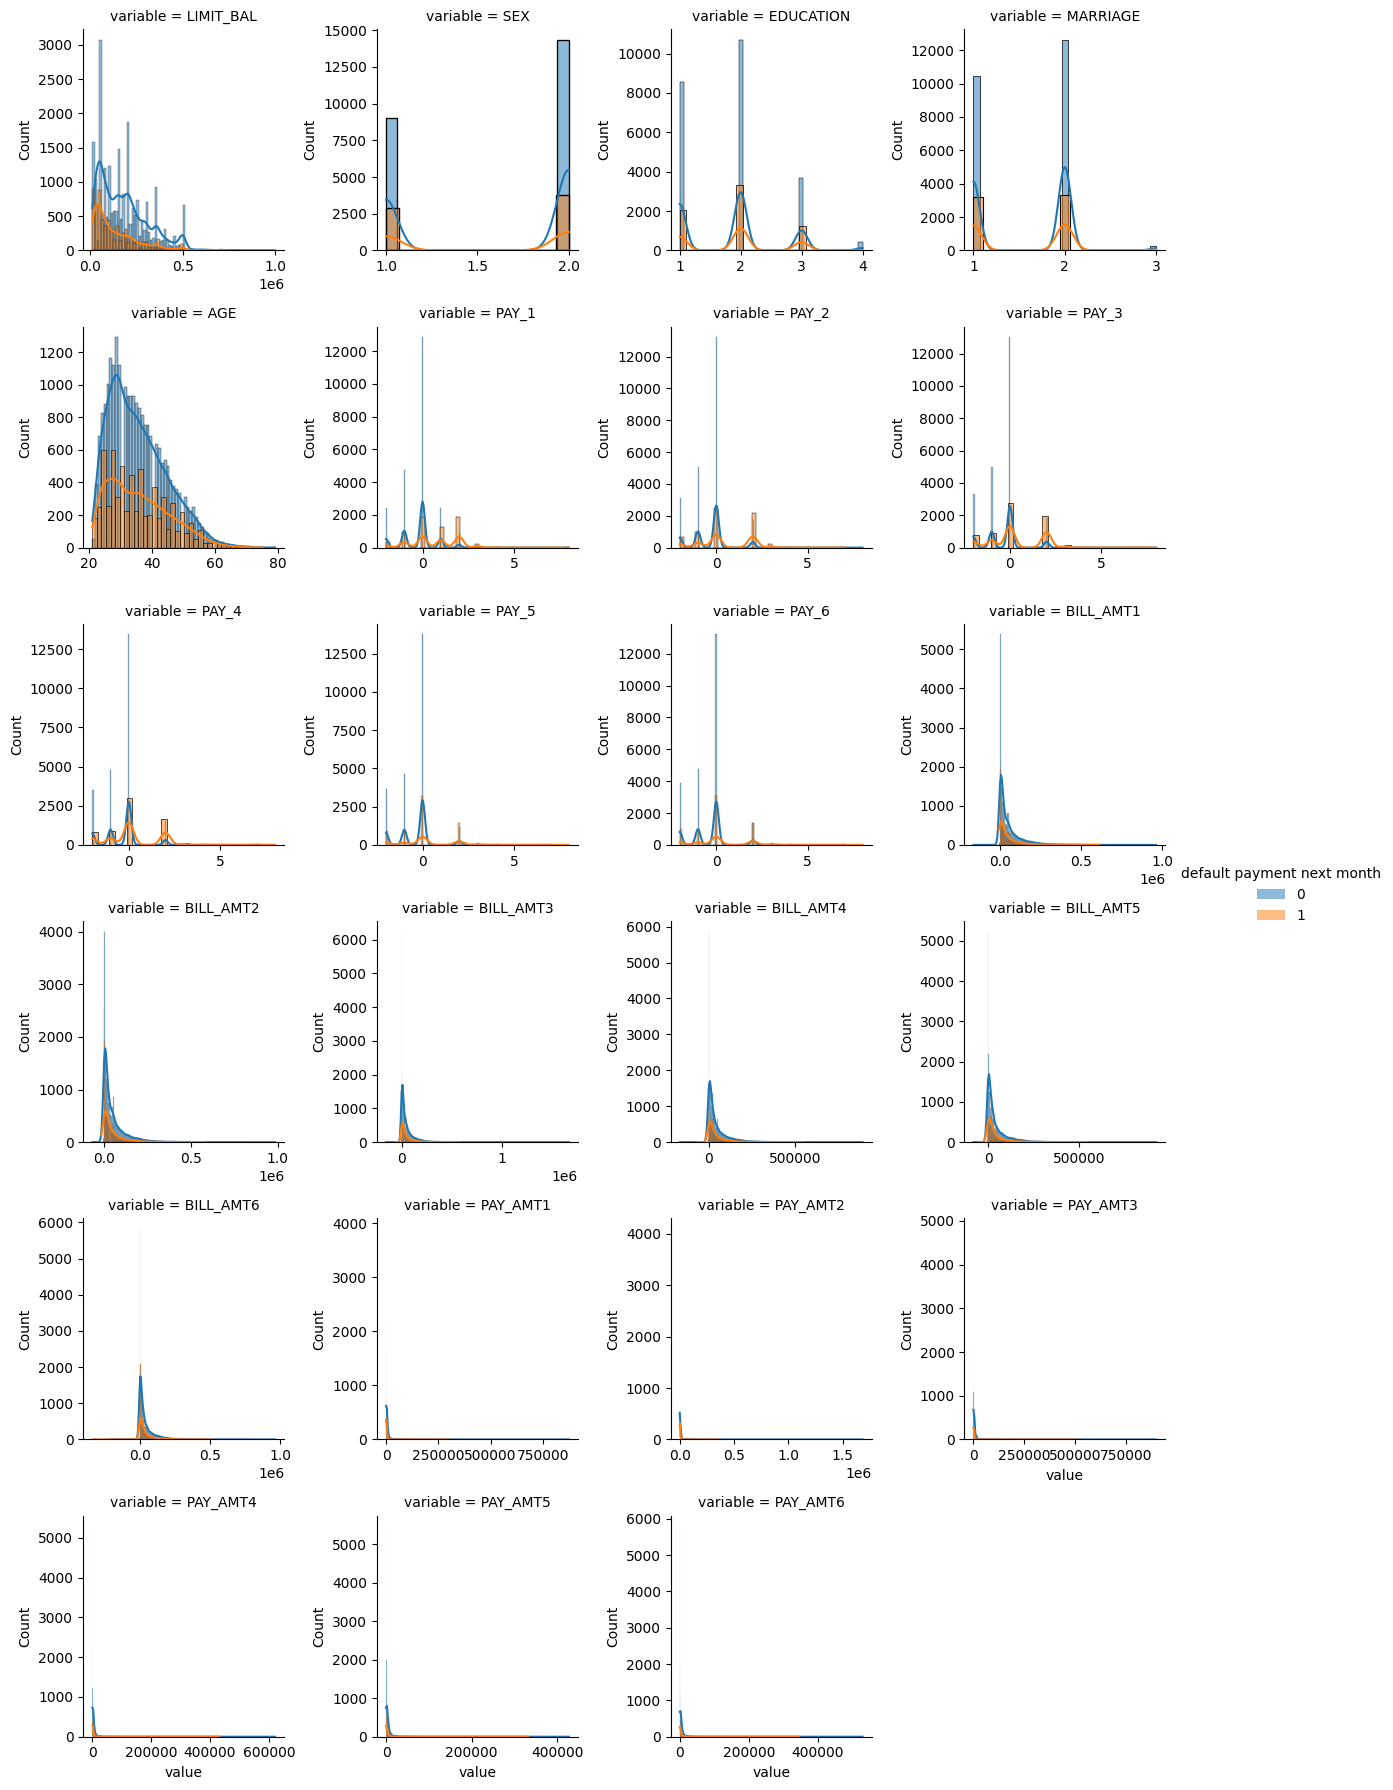

In [7]:
Y = 'default payment next month'
cols = [ i for i in credit.columns]
cols.remove('ID')
cols.remove('default payment next month')


f = pd.melt(credit, id_vars=Y, value_vars=cols)
g = sns.FacetGrid(f, hue=Y, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True).add_legend()
print(g)

Correlation Matrix

<AxesSubplot: >

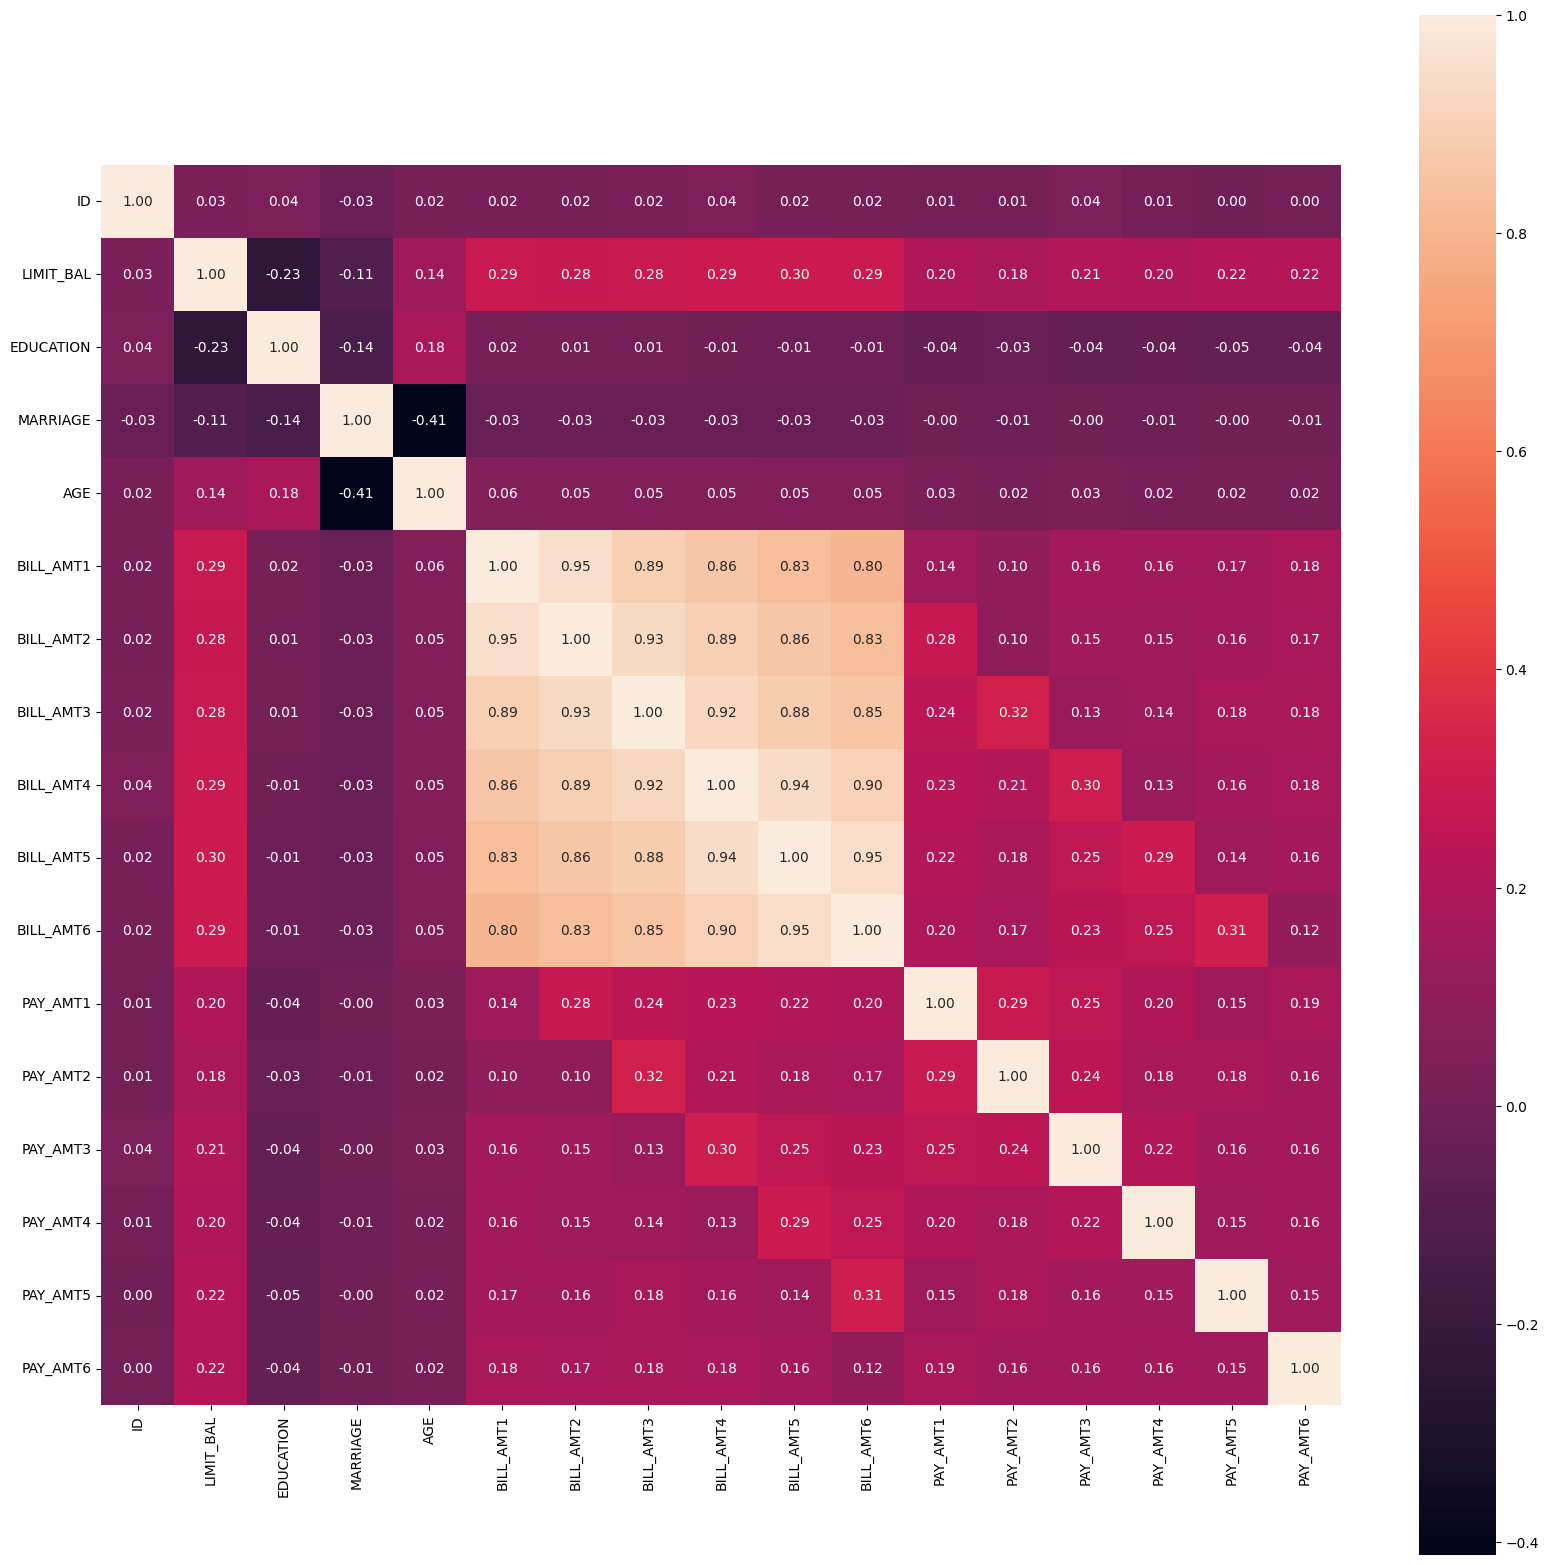

In [8]:
corr = credit.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, square=True, annot=True, fmt=".2f" )

### Data Preprocessing

Train-test-split

In [9]:
#Train-test splitting
from sklearn.model_selection import train_test_split
train_credit, test_credit = train_test_split(credit, test_size=0.25, random_state=42, stratify=credit["default payment next month"])
target = train_credit['default payment next month']
features = train_credit.drop('default payment next month', axis = 1)


### Feature Selection

In [10]:
!pip install mlxtend==0.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


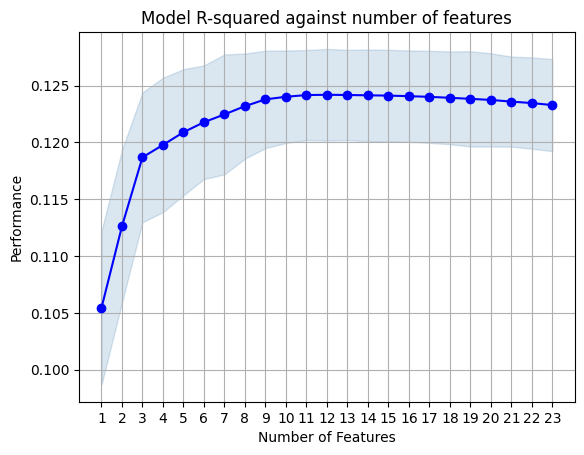

In [11]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

# stepwise regression to decide number of features
sfs = SFS(LinearRegression(), k_features = (2,23), forward = True, floating = False, scoring = 'r2')
sfs.fit(features, target)
# fig = plot_sfs(sfs.get_metric_dict(), kind = 'std_dev')
fig = plot_sfs(sfs.get_metric_dict())
plt.title('Model R-squared against number of features')
plt.grid()
plt.show()

In [12]:
#stepwise forward regression
sfs1 = SFS(LinearRegression(), k_features = 9, forward = True, floating = False, scoring = 'r2'
        , cv = 0)
sfs1.fit(features, target)
print(sfs1.k_feature_names_)

('LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'PAY_AMT1')


In [13]:
#stepwise backward regression
sbs = SFS(LinearRegression(), k_features = 9, forward = False, floating = False, scoring = 'r2',
         cv = 0)
sbs.fit(features, target)
print(sbs.k_feature_names_)

('LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'PAY_AMT1')


In [14]:
#forward-backward regression
sfbs = SFS(LinearRegression(), k_features = 9, forward = True, floating = True, scoring = 'r2',
         cv = 0)
sfbs.fit(features, target)
print(sfbs.k_feature_names_)

#Since all 3 regressions yield the same results, we will use these 9 features.

('LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'PAY_AMT1')


Subsetting the best 9 features

In [15]:
selectedX_training = train_credit[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 
                               'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'PAY_AMT1']].copy()

selectedX_test = test_credit[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 
                      'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'PAY_AMT1']].copy()
Y_training = train_credit[['default payment next month']]
Y_test = test_credit[['default payment next month']]

Normalising the data

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
selectedX_training = sc.fit_transform(selectedX_training)
selectedX_test = sc.fit_transform(selectedX_test)

### Model Selection and Training

In [17]:
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.neighbors import *
from sklearn.discriminant_analysis import *
from sklearn.naive_bayes import *
from sklearn.ensemble import *
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

models = []
models.append(['Logistic Regression', LogisticRegression()])
models.append(['Linear Discriminant Analysis ', LinearDiscriminantAnalysis()])
models.append(['Naive Bayes', GaussianNB()])
models.append(['K-Nearest Neighbors', KNeighborsClassifier()])
models.append(['Support Vector Machine', SVC(probability = True)])
models.append(['Decision Tree Classifier', DecisionTreeClassifier()])
models.append(['Random Forest Classifier', RandomForestClassifier()])

#neural network using Keras
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
selectedX_training = np.asarray(selectedX_training).astype(np.int_)
Y_training = np.array(Y_training).astype(np.int_)

model_NN = Sequential()
model_NN.add(Dense(4, input_shape = (9,), activation = 'relu'))
model_NN.add(Dense(4, activation = 'relu'))
model_NN.add(Dense(1, activation = 'sigmoid'))
model_NN.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


2022-11-18 05:15:29.618227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 05:15:29.786982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-18 05:15:29.787019: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-18 05:15:29.827464: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 05:15:32.853055: W tensorflow/stream_executor/pla

### Model Evaluation

Evaluation on Train Set

In [18]:
# evaluate each model on training set

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for name, model in models:
  results = cross_val_score(model, selectedX_training, Y_training, 
                               cv=kfold, scoring='accuracy')

  print(f'{name} - Accuracy: {results.mean()}')

#evaluating NN model on training set
model_NN.fit(selectedX_training, Y_training, 
epochs = 5, batch_size = 8, steps_per_epoch = 2000, verbose = 1)
print(f'Keras Model Accuracy: {model_NN.evaluate(selectedX_training, Y_training)}')



Logistic Regression - Accuracy: 0.8085333333333333
Linear Discriminant Analysis  - Accuracy: 0.8016888888888889
Naive Bayes - Accuracy: 0.8142222222222223
K-Nearest Neighbors - Accuracy: 0.8006222222222223
Support Vector Machine - Accuracy: 0.8179555555555555
Decision Tree Classifier - Accuracy: 0.8076888888888888
Random Forest Classifier - Accuracy: 0.8092444444444447
Epoch 1/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5022 - accuracy: 0.7945
Epoch 2/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4533 - accuracy: 0.8134
Epoch 3/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4504 - accuracy: 0.8167
Epoch 4/5
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4468 - accuracy: 0.8223
Epoch 5/5
704/704 [==============================] - 1s 2ms/step - loss: 0.4449 - accuracy: 0.8192
Keras Model Accuracy: [0.44487464427948, 0.8192444443702698]


Evaluate on Test Set

1. Class Accuracy Score

In [19]:
from sklearn.metrics import *

for name, model in models:
    model.fit(selectedX_training, Y_training)
    Y_pred = model.predict(selectedX_test)
    print(name)
    print("Overall accuracy: ", accuracy_score(Y_test, Y_pred))
    print("Average class accuracy: ", balanced_accuracy_score(Y_test, Y_pred))


Logistic Regression
Overall accuracy:  0.8098666666666666
Average class accuracy:  0.6746627707794839
Linear Discriminant Analysis 
Overall accuracy:  0.8092
Average class accuracy:  0.6684085777627936
Naive Bayes
Overall accuracy:  0.7018666666666666
Average class accuracy:  0.6791236606726845
K-Nearest Neighbors
Overall accuracy:  0.7853333333333333
Average class accuracy:  0.6476912441297766
Support Vector Machine
Overall accuracy:  0.8037333333333333
Average class accuracy:  0.6689988121011506
Decision Tree Classifier
Overall accuracy:  0.7578666666666667
Average class accuracy:  0.6067525408868468
Random Forest Classifier
Overall accuracy:  0.7716
Average class accuracy:  0.6513897673520073


In [20]:
#accuracy of NN model on test set
predict = (model_NN.predict(selectedX_test) > 0.5).astype(int)
Y_test = np.array(Y_test).astype(np.int_)
result = model_NN.evaluate(selectedX_test, Y_test)
print(result)

235/235 [==============================] - 1s 2ms/step - loss: 0.4647 - accuracy: 0.8053
[0.4646625220775604, 0.8053333163261414]


2. ROC Curve

In [21]:
models

[['Logistic Regression', LogisticRegression()],
 ['Linear Discriminant Analysis ', LinearDiscriminantAnalysis()],
 ['Naive Bayes', GaussianNB()],
 ['K-Nearest Neighbors', KNeighborsClassifier()],
 ['Support Vector Machine', SVC(probability=True)],
 ['Decision Tree Classifier', DecisionTreeClassifier()],
 ['Random Forest Classifier', RandomForestClassifier()]]

235/235 [==============================] - 0s 1ms/step


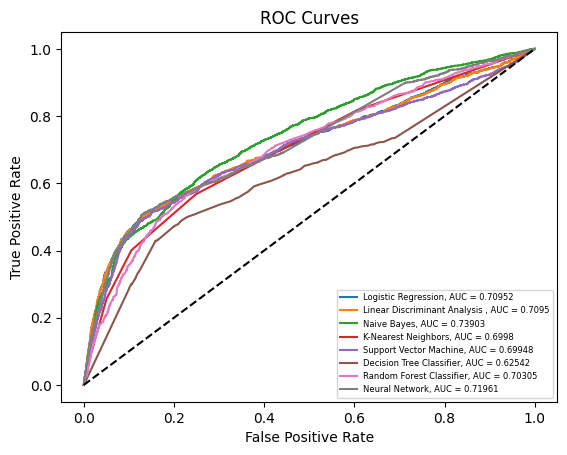

In [22]:
#Evaluation - ROC curve
from sklearn import *

plt.figure(0).clf()
for name, model in models:
    model.fit(selectedX_training, Y_training)
    predict = model.predict_proba(selectedX_test)[:,1]
    fpr, tpr, i = metrics.roc_curve(Y_test, predict)
    plt.plot(fpr, tpr, label = f'{name}, AUC = {round(metrics.roc_auc_score(Y_test, predict),5)}')

predict_NN = model_NN.predict(selectedX_test)
fpr,tpr,i = metrics.roc_curve(Y_test, predict_NN)
plt.plot(fpr, tpr, label = f'Neural Network, AUC = {round(metrics.roc_auc_score(Y_test, predict_NN),5)}')
plt.plot([0,1],[0,1],'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right', prop={'size': 6})
plt.show()

### 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f58ca79d-e386-46c1-bb76-ccd16b8a9392' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>